# Importing Libraries

In [2]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Dataset

In [3]:
path = r"https://drive.google.com/uc?export=download&id=13ZTYmL3E8S0nz-UKl4aaTZJaI3DVBGHM"
df  = pd.read_csv(path)

In [4]:
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [5]:
df.tail()

,study_hours,student_marks
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05
199,8.35,83.50


In [6]:
df.shape

(200, 2)

## Discover and visualize the data to gain insights

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [8]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


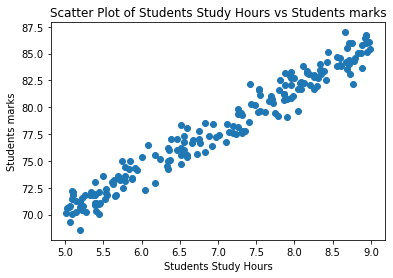

In [9]:
plt.scatter(x =df.study_hours, y = df.student_marks)
plt.xlabel("Students Study Hours")
plt.ylabel("Students marks")
plt.title("Scatter Plot of Students Study Hours vs Students marks")
plt.show()

## Prepare the data for Machine Learning algorithms 

In [10]:
# Data Cleaning

In [11]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [12]:
df.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [13]:
df2 = df.fillna(df.mean())

In [14]:
df2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [15]:
df2.head()

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19


In [16]:
# split dataset

In [17]:
X = df2.drop("student_marks", axis = "columns")
y = df2.drop("study_hours", axis = "columns")
print("shape of X = ", X.shape)
print("shape of y = ", y.shape)

shape of X =  (200, 1)
shape of y =  (200, 1)


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=51)
print("shape of X_train = ", X_train.shape)
print("shape of y_train = ", y_train.shape)
print("shape of X_test = ", X_test.shape)
print("shape of y_test = ", y_test.shape)

shape of X_train =  (160, 1)
shape of y_train =  (160, 1)
shape of X_test =  (40, 1)
shape of y_test =  (40, 1)


# Select a model and train it

In [19]:
 # y = m * x + c
 from sklearn.linear_model import LinearRegression
 lr = LinearRegression()

In [20]:
lr.fit(X_train,y_train)

LinearRegression()

In [21]:
lr.coef_

array([[3.93571802]])

In [22]:
lr.intercept_

array([50.44735504])

In [23]:
m = 3.93
c = 50.44
y  = m * 4 + c 
y

66.16

In [24]:
lr.predict([[5]])[0][0].round(2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


70.13

In [25]:
y_pred  = lr.predict(X_test)
y_pred


array([[83.11381458],
       [78.9025963 ],
       [84.57003024],
       [85.82946001],
       [84.72745896],
       [80.75238377],
       [72.84159055],
       [71.66087515],
       [73.23516235],
       [71.66087515],
       [73.47130543],
       [76.38373677],
       [73.23516235],
       [73.58937697],
       [82.95638585],
       [70.40144538],
       [73.23516235],
       [78.74516758],
       [75.55723598],
       [82.68088559],
       [76.65923703],
       [70.48015974],
       [74.77009238],
       [77.98143645],
       [85.59331693],
       [82.56281405],
       [76.42309395],
       [85.0423164 ],
       [78.39095296],
       [81.38209865],
       [81.73631327],
       [83.15317176],
       [82.20859943],
       [81.10659839],
       [73.58937697],
       [71.1492318 ],
       [71.89701823],
       [81.53952737],
       [72.60544747],
       [71.93637541]])

In [26]:
pd.DataFrame(np.c_[X_test, y_test, y_pred], columns = ["study_hours", "student_marks_original","student_marks_predicted"])

,study_hours,student_marks_original,student_marks_predicted
0,8.300000,82.02,83.113815
1,7.230000,77.55,78.902596
2,8.670000,84.19,84.570030
3,8.990000,85.46,85.829460
4,8.710000,84.03,84.727459
5,7.700000,80.81,80.752384
6,5.690000,73.61,72.841591
7,5.390000,70.90,71.660875
8,5.790000,73.14,73.235162
9,5.390000,73.02,71.660875


## Fine-tune your model

In [27]:

lr.score(X_test,y_test)


0.9514124242154466

In [28]:
cutoff=0.7
y_pred_classes=np.zeros_like(y_pred)
y_pred_classes[y_pred>cutoff]=1
y_test_classes=np.zeros_like(y_pred)
y_test_classes[y_pred>cutoff]=1
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test_classes,y_pred_classes)
print(confusion_matrix)


[[40]]


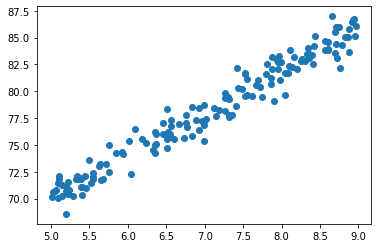

In [29]:
plt.scatter(X_train,y_train)

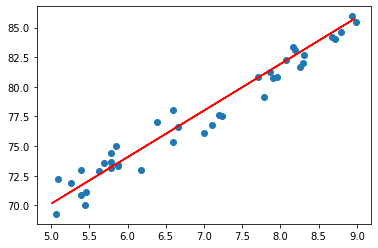

In [30]:
plt.scatter(X_test, y_test)
plt.plot(X_train, lr.predict(X_train), color = "r")


In [31]:
import joblib
joblib.dump(lr,"college_mark_predictor.pkl")

['college_mark_predictor.pkl']

In [32]:
model=joblib.load("college_mark_predictor.pkl")

In [33]:
model.predict([[7]])[0][0]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


77.9973811534807

In [42]:
#linear regression
pred4  = lr.predict(X_test).sum(axis=1)

In [46]:
#Random_Forest_Regressor
from sklearn.ensemble import RandomForestRegressor
model1=RandomForestRegressor(n_estimators=500,bootstrap=True,max_depth=50,max_features=0.25,min_samples_leaf=7,min_samples_split=10)
model1.fit(X_train,y_train)
pred1=model1.predict(X_test)
print(pred1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


[83.12466839 78.7031796  84.65152764 85.31568691 84.75792516 80.64581734
 72.53499902 71.51432882 73.60924665 71.51432882 74.17774725 76.46457665
 73.60924665 74.24756057 83.08234845 70.73853575 73.60924665 78.23525072
 75.44893024 82.87612621 76.59698105 70.73853575 75.15805907 77.36159539
 85.31568691 82.86221541 76.47267671 85.03646592 77.91473186 81.31054167
 82.03963034 83.15181317 82.0605921  81.19374619 74.24756057 70.84661895
 71.80819112 81.56570731 72.49920059 71.81051922]


In [36]:
#Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
model2= GradientBoostingRegressor()
model2.fit(X_train,y_train)
pred2=model2.predict(X_test)
print(pred2)

[82.89007097 78.89905173 86.22680275 86.03668113 84.88356622 80.52099891
 72.12738959 71.55722741 73.52932483 71.55722741 74.18975873 76.35850975
 73.52932483 74.18975873 82.89007097 70.75182103 73.52932483 78.20914794
 75.485444   82.7349325  76.50796123 70.75182103 75.32786462 77.22531571
 86.50008598 82.7349325  76.35850975 84.31501424 78.03733365 81.42383186
 82.33043974 82.89007097 81.7553367  81.53332859 74.18975873 70.75021278
 71.39353984 80.58429454 72.77842334 71.39353984]


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
#Bayesian Ridge
from sklearn.linear_model import BayesianRidge
model3=BayesianRidge()
model3.fit(X_train,y_train)
pred3=model3.predict(X_test)
print(pred3)

[83.11245344 78.90236786 84.56827743 85.82736844 84.72566381 80.75165779
 72.84299236 71.66259453 73.2364583  71.66259453 73.47253786 76.38418583
 73.2364583  73.59057765 82.95506707 70.40350352 73.2364583  78.74498149
 75.55790736 82.67964091 76.65961199 70.4821967  74.77097547 77.98145578
 85.59128888 82.56160113 76.42353243 85.04043656 78.39086214 81.3812033
 81.73532265 83.15180004 82.20748178 81.10577714 73.59057765 71.15108881
 71.8986741  81.53858968 72.60691279 71.93802069]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
#accuracy
from sklearn.metrics import r2_score
ensemble_prediction=(pred1*0.1+pred2*0.6+pred3*0.3)
r2_score_ensemble=r2_score(y_test,ensemble_prediction)
print("Ensemble MoDEL Accuracy")
print(r2_score_ensemble)


Ensemble MoDEL Accuracy
0.9514297285757417


In [39]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import explained_variance_score
r2_score1=r2_score(y_test,pred1)
variance_score1=explained_variance_score(y_test,pred1)
mean_absolute_error1=mean_absolute_error(y_test,pred1)
mean_squared_log_error1=mean_squared_log_error(y_test,pred1)

r2_score2=r2_score(y_test,pred2)
variance_score2=explained_variance_score(y_test,pred2)
mean_absolute_error2=mean_absolute_error(y_test,pred2)
mean_squared_log_error2=mean_squared_log_error(y_test,pred2)

r2_score3=r2_score(y_test,pred3)
variance_score3=explained_variance_score(y_test,pred3)
mean_absolute_error3=mean_absolute_error(y_test,pred3)
mean_squared_log_error3=mean_squared_log_error(y_test,pred3)

r2_score4=r2_score(y_test,pred4)
variance_score4=explained_variance_score(y_test,pred4)
mean_absolute_error4=mean_absolute_error(y_test,pred4)
mean_squared_log_error4=mean_squared_log_error(y_test,pred4)


In [40]:
#printing the values
print("Ranom Forest Regressor Report")
print("-> R2 Score:",r2_score1)
print("->mean absolute error:",mean_absolute_error1)
print("->variance_score:",variance_score1)
print("-> mean squared log error:",mean_squared_log_error1)

#gradient Boosting

print("\n")
print("Gradient Boosting Report")
print("-> R2 Score:",r2_score2)
print("->mean absolute error:",mean_absolute_error2)
print("->variance_score:",variance_score2)
print("-> mean squared log error:",mean_squared_log_error2)

#Bayesian Ridge
print("\n")
print("Bayesian Ridge Report")
print("-> R2 Score:",r2_score3)
print("->mean absolute error:",mean_absolute_error3)
print("->variance_score:",variance_score3)
print("-> mean squared log error:",mean_squared_log_error3)

#linear regressor
print("\n")
print("Linear Regression Report")
print("-> R2 Score:",r2_score4)
print("->mean absolute error:",mean_absolute_error4)
print("->variance_score:",variance_score4)
print("-> mean squared log error:",mean_squared_log_error4)

Ranom Forest Regressor Report
-> R2 Score: 0.9525019970157329
->mean absolute error: 0.884070685932221
->variance_score: 0.9557256597125527
-> mean squared log error: 0.00018436409207561825


Gradient Boosting Report
-> R2 Score: 0.9468289643883667
->mean absolute error: 0.9199059023563496
->variance_score: 0.9499422534167231
-> mean squared log error: 0.0002014760712051776


Bayesian Ridge Report
-> R2 Score: 0.9514397040574369
->mean absolute error: 0.8778114159352419
->variance_score: 0.9539346777962244
-> mean squared log error: 0.0001876727444270108


Linear Regression Report
-> R2 Score: 0.9514124242154466
->mean absolute error: 0.8780690208883168
->variance_score: 0.953905376204821
-> mean squared log error: 0.00018776728317174642


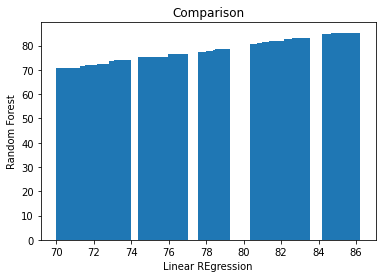

In [50]:
plt.bar(pred4,pred1)
plt.title('Comparison')
plt.xlabel('Linear REgression')
plt.ylabel('Random Forest')
plt.show()

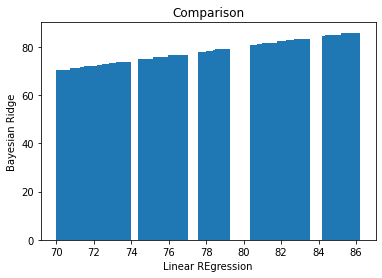

In [49]:
plt.bar(pred4,pred3)
plt.title('Comparison')
plt.xlabel('Linear REgression')
plt.ylabel('Bayesian Ridge')
plt.show()

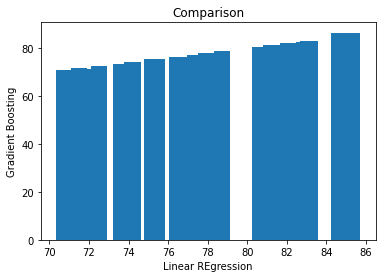

In [51]:
plt.bar(pred1,pred2)
plt.title('Comparison')
plt.xlabel('Linear REgression')
plt.ylabel('Gradient Boosting')
plt.show()

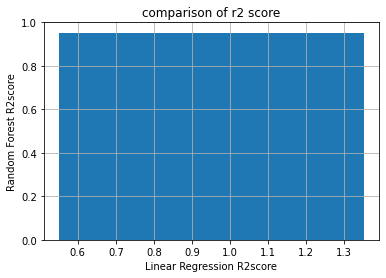

In [56]:
a=r2_score1
b=r2_score4
plt.title("comparison of r2 score")
plt.bar(b,a)
plt.xlabel("Linear Regression R2score")
plt.ylabel("Random Forest R2score")
plt.grid()


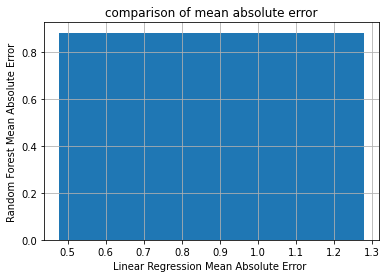

In [57]:
c=mean_absolute_error1
d=mean_absolute_error4
plt.title("comparison of mean absolute error")
plt.bar(d,c)
plt.xlabel("Linear Regression Mean Absolute Error ")
plt.ylabel("Random Forest Mean Absolute Error")
plt.grid()
plt.show()